# Modeling rainfall-runoff

## Rainfall-runoff models

For the runoff response of a river after rainfall, it is important to understand how quickly the rainfall on the land surface contributes to runoff. Various hydrological models exist for this purpose. In all models, hydrological processes are approximated using theoretical concepts. Sometimes, processes are greatly simplified or even neglected. This also indicates the conditions under which a hydrological model is applicable. Three models are discussed.

The first model, based on the storage principle, simulates the contribution of surface runoff to the total river discharge using the concept of a single outflowing reservoir. The inflow into this conceptual reservoir is the *effective precipitation* $P_a$ (NL: *afvoerbare neerslag*), as discussed in the previous chapter.

The second model, known as the rational method or time of concentration method, focuses on the duration of surface runoff from an impermeable area to the river as a central concept. Again, the effective precipitation $P_a$ is considered. The base flow contribution from groundwater to river discharge is not taken into account in these two models.

For larger catchments and/or when modeling the rainfall-runoff process over longer durations, it is usually important to consider the different processes involved. For this purpose, a conceptual storage model, also known as a conceptual bucket model, can be used to identify and represent the various occurring processes.

## The storage principle

### Principle

The runoff process involves elements of storage and transport. The storage principle establishes a relationship between the *storm runoff* $Q$  (also: *stormflow*; expressed per unit of area [L/T]) - consisting typically of overland flow and rapid subsurface flow (see {numref}`fluxes_and_storage`) - and the remaining available net precipitation $S$ that is temporarily stored somewhere in the catchment, without explicitly considering travel times. {numref}`fig:PaenQenS` shows the effective precipitation $P_a$ and the storm runoff $Q$. 

Below, the corresponding cumulative curves of storm runoff and effective precipitation intensity are plotted. At each time $t$, the storage $S$ [mm] present in the catchment is the difference between the two cumulative curves at that time.

```{figure} ../images/9.24-PaenQenS.jpg
---
height: 300px
name: fig:PaenQenS
---
Effective precipitation $P_a$ and storm runoff $Q$ plotted. Below this, the cumulative net precipitation that is temporarily stored somewhere in the catchment and the cumulative runoff are plotted, the difference being expressed as the storage $S$.
```

It is now assumed that the storm runoff $Q$ depends on the storage $S$ at the same time. This relationship between storage and runoff is usually represented by a formula also used for reservoirs:

$$
S=kQ^n \quad \text{[L$^3$]}
$$ (Storage_runoff)

The same formula is used per unit of area, but with depth as the unit instead of volume.

The simplest relationship is given by $n=1$ (a linear relationship), where the storage is proportional to the storm runoff. In this case, $k$ is a proportionality constant with the dimension of time and is also referred to as the *residence time* (NL: *verblijftijd*).

### Derivation and application

The magnitude of $k$ can be determined from observed storms and their corresponding runoff. The difficulty here is, of course, to determine the existing storage in the catchment. However, based on precipitation measurements, a reasonable estimate can often be made.

The derivation for an expression for $Q$ (per unit of area) that does not include storage is as follows:

**Runoff mechanism** 

$$ 
S=kQ \longrightarrow \frac{dS}{dt}=k\frac{dQ}{dt} \hspace{4cm} \text{[L/T]} 
$$ (runoff_mech)

**Continuity**

$$ 
dS=(P_a-Q)dt  \hspace{4.9cm} \text{[L]} 
$$ (continuity)

**Hence**: 

$$ 
k\frac{dQ}{dt}=P_a-Q \hspace{5.2cm} \text{[L/T]} 
$$ (hence)

This leads to the following **expression for $Q$**: 

$$
Q=P_a+(Q_0-P_a)e^{\frac{-t}{k}} \hspace{3.8cm} \text{[L/T]} 
$$ (Q_expression)


This formula is valid for each time interval in which $P_a$ is constant. Additionally, the calculated value for $Q$ at the end of an interval becomes $Q_0$ for the next interval, and so on (see also {numref}`ex_storage_method`). It can be observed that the runoff from $Q_0$ increases or decreases towards $P_a$. In theory, the runoff at the end of an infinitely long time interval would be equal to the effective precipitation intensity $P_a$ of that interval. For practical use, equal time steps $\Delta t$ are usually employed, assuming a linear runoff response within each step.

In that case, the following applies for the numerical solution:

**Runoff mechanism**

$$ 
S_1=kQ_1 \hspace{3.4cm} \text{[L]} 
$$ (runoff_mechanism)

$$
S_2=kQ_2  \hspace{3.6cm} \text{[L]}  
$$ (S2)

$$
S_2-S_1=k(Q_2-Q_1)  \hspace{3cm} \text{[L]} 
$$ (S2_S1)

**Continuity** 

$$ 
S_2=S_1+\bigg( P_a-\frac{1}{2}(Q_1+Q_2) \bigg) \Delta t \hspace{2.5cm} \text{[L]} 
$$ (S2_cont)

This leads to the following **expression for $Q_2$**:

$$ 
Q_2=\frac{k-\frac{1}{2}\Delta t}{k+\frac{1}{2}\Delta t}Q_1+\frac{\Delta t}{k+\frac{1}{2}\Delta t}P_a \hspace{2.8cm} \text{[L/T]}  
$$ (Q2_new)

Where:

| | | | |
| --- | --- | --- | --- |
| $k$ | Residence time (NL: Verblijftijd) | [T] |
| $S_1$ | Storage at the beginning of the interval | [L]  |
| $S_2$ | Storage at the end of the interval | [L] |
| $Q_1$ | Storm runoff at the beginning of the interval | [L/T] |
| $Q_2$ | Storm runoff at the end of the interval | [L/T] |

```{Note}
The sum of the coefficients for $Q_1$ and $P_a$ is equal to 1.
```

Equation {eq}`Q2_new` can be easily used to calculate the runoff at successive time steps; the calculated $Q_2$ is substituted as $Q_1$ in the next time step.

In [1]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_storage_method
```
In a catchment there is a linear relationship between storm runoff and storage. The time steps $\Delta t$ are consistently set at 0.5 hours. The rainfall intensity $i$ is shown in the plot below. There is a loss fraction of 20\%.

a) Determine the expression for $Q_2$ for $k=0.5$ h, $k=1$ h and $k=2$ h.  

b) For $k$ = 0.5 h, determine $Q_t$ and $Q_{t+\Delta t}$ in mm/h for $t$ = 0 h until $t$ = 5 h, with $\Delta t$ = 0.5 h.

c) Do the same for $k$ = 1 h and $k$ = 2 h. 

d) Plot $Q_t$ for the different values of $k$. What is the influence of $k$ on the response of the watershed?

e) Now compute the storm runoff for $k$ = 0.5 h for:
- A constant loss of 15 mm/h
- An initial loss of 27 mm/h and thereafter a constant loss of 10 mm/h. 

Plot the results together with the result of question b.
```{exercise-end}
```

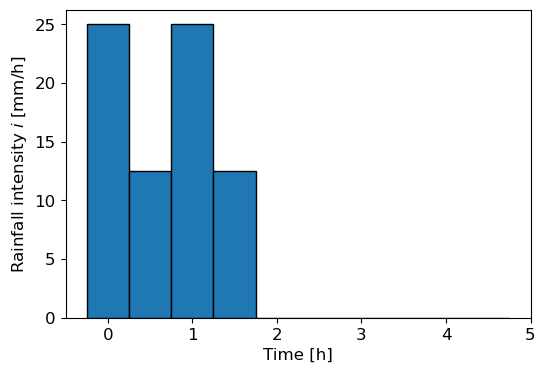

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

dt = 0.5
t = np.arange(0, 5.01, dt)
P = np.array([25,12.5,25,12.5,0,0,0,0,0,0])
plt.figure(figsize=(6,4))
plt.bar(t[:-1], P, width=0.5, edgecolor='black')
plt.xlabel('Time [h]')
plt.ylabel(r'Rainfall intensity $i$ [mm/h]');

::::::{dropdown} Answer&nbsp;{ref}`ex_storage_method`a

$Q_2$ is given by:

$$
Q_2=\frac{k-\frac{1}{2}\Delta t}{k+\frac{1}{2}\Delta t}Q_1+\frac{\Delta t}{k+\frac{1}{2}\Delta t}P_a \hspace{2.8cm} \text{[L/T]} 
$$

For $k=0.5$ h:

$$
Q_2 = \frac{0.5 - \frac{1}{2} \cdot 0.5}{0.5+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{0.5+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = \frac{1}{3}Q_1 + \frac{2}{3}P_a
$$

For $k=1$ h:

$$
Q_2 = \frac{1 - \frac{1}{2} \cdot 0.5}{1+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{1+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = 0.6Q_1 + 0.4P_a
$$

For $k=2$ h:

$$
Q_2 = \frac{2 - \frac{1}{2} \cdot 0.5}{2+\frac{1}{2}\cdot 0.5}Q_1+\frac{0.5}{2+\frac{1}{2}\cdot 0.5}P_a
$$

$$
Q_2 = 0.78Q_1 + 0.22P_a
$$

:::


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`b
The results are computed in the Python code below:
:::

In [3]:
Pa = (1-0.2)*P # take into account the loss fraction
Qt05 = np.zeros(len(t))
Qtdt05 = np.zeros(len(t))
def Q_k05(Q, P):
    return 1/3*Q + 2/3*P

for i in range(len(t)-1):
    Qtdt05[i] = Q_k05(Qt05[i], Pa[i])
    Qt05[i+1] = Qtdt05[i]
    
print('Q_t: ', np.round(Qt05, 1))
print('Q_{t+dt}: ', np.round(Qtdt05, 1))


Q_t:  [ 0.  13.3 11.1 17.  12.3  4.1  1.4  0.5  0.2  0.1  0. ]
Q_{t+dt}:  [13.3 11.1 17.  12.3  4.1  1.4  0.5  0.2  0.1  0.   0. ]


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`c
The results are computed in the Python code below:
:::

In [4]:
Qt1 = np.zeros(len(t))
Qtdt1 = np.zeros(len(t))

Qt2 = np.zeros(len(t))
Qtdt2 = np.zeros(len(t))

def Q_k1(Q, P):
    return 0.6*Q + 0.4*P

def Q_k2(Q, P):
    return 0.78*Q + 0.22*P

for i in range(len(t)-1):
    Qtdt1[i] = Q_k1(Qt1[i], Pa[i])
    Qt1[i+1] = Qtdt1[i]
    
print('k=1')
print('Q_t: ', np.round(Qt1, 1))
print('Q_{t+dt}: ', np.round(Qtdt1, 1))

for i in range(len(t)-1):
    Qtdt2[i] = Q_k2(Qt2[i], Pa[i])
    Qt2[i+1] = Qtdt2[i]
    
print('k=2')
print('Q_t: ', np.round(Qt2, 1))
print('Q_{t+dt}: ', np.round(Qtdt2, 1))


k=1
Q_t:  [ 0.   8.   8.8 13.3 12.   7.2  4.3  2.6  1.6  0.9  0.6]
Q_{t+dt}:  [ 8.   8.8 13.3 12.   7.2  4.3  2.6  1.6  0.9  0.6  0. ]
k=2
Q_t:  [0.  4.4 5.6 8.8 9.1 7.1 5.5 4.3 3.4 2.6 2. ]
Q_{t+dt}:  [4.4 5.6 8.8 9.1 7.1 5.5 4.3 3.4 2.6 2.  0. ]


:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`d

The figure below shows the variation of the storm runoff for different values of k; it is clear that the watershed responds more slowly as the lag time increases. Therefore, k can be assigned a physical meaning in this regard. It is also noticeable that the peaks due to the storm runoff occur exactly at the end of time intervals with high rainfall intensities; this is a result of neglecting the actual travel times within the watershed (since the runoff is assumed to be proportional to the storage).
:::


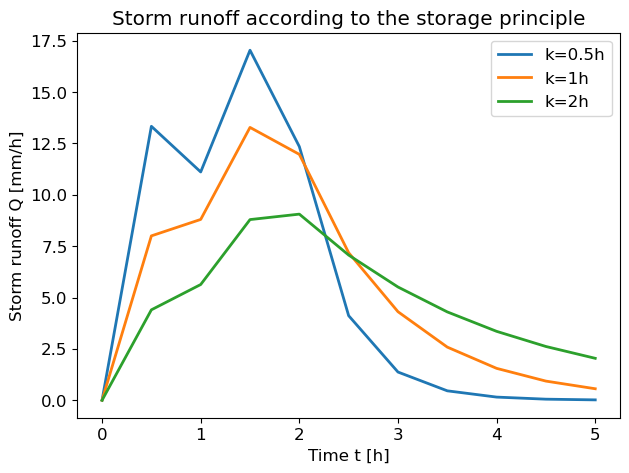

In [5]:
plt.figure(figsize=(7,5))
plt.plot(t, Qt05, label='k=0.5h')
plt.plot(t, Qt1, label='k=1h')
plt.plot(t, Qt2, label='k=2h')
plt.xlabel('Time t [h]')
plt.ylabel(r'Storm runoff Q [mm/h]')
plt.title('Storm runoff according to the storage principle')
plt.legend();

:::{dropdown} Answer&nbsp;{ref}`ex_storage_method`e

The figure below shows the variation of the storm runoff for different types of rainfall losses.
:::

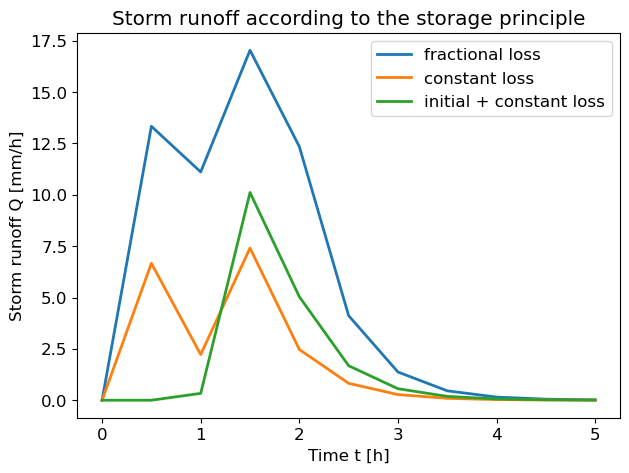

In [6]:
# constant loss of 15 mm/h
Pa = P - 15
Pa[Pa < 0] = 0

Qt_const = np.zeros(len(t))
Qtdt_const = np.zeros(len(t))
for i in range(len(t)-1):
    Qtdt_const[i] = Q_k05(Qt_const[i], Pa[i])
    Qt_const[i+1] = Qtdt_const[i]
    
# initial loss of 27 mm/h
Pa = P.copy()
Pa[0] -= 27
for i in range(len(Pa)):
    if Pa[i] < 0:
        Pa[i+1] -= abs(Pa[i])
        Pa[i] = 0
    else:
        break
# constant loss of 10 mm/h after initial loss
Pa = Pa - 10
Pa[Pa < 0] = 0

Qt_init = np.zeros(len(t))
Qtdt_init = np.zeros(len(t))
for i in range(len(t)-1):
    Qtdt_init[i] = Q_k05(Qt_init[i], Pa[i])
    Qt_init[i+1] = Qtdt_init[i]
     
    
plt.figure(figsize=(7,5))
plt.plot(t, Qt05, label='fractional loss')
plt.plot(t, Qt_const, label='constant loss')
plt.plot(t, Qt_init, label='initial + constant loss')
plt.xlabel('Time t [h]')
plt.ylabel(r'Storm runoff Q [mm/h]')
plt.title('Storm runoff according to the storage principle')
plt.legend();

(rational-method)=
## The rational method

One of the most commonly used procedures for calculating storm runoff from small drainages (less than 1 km$^2$) is the rational method. This method is most accurate for runoff estimates from small drainages with large amounts of impervious area. Examples of catchments are housing developments, industrial areas, parking lots, etc. The rational method is embedded in commercial softwares such as SWMM.

The rational method (or rational formula) is:

$$
    Q = C_f\ C\ i\ A
$$ (rational)

Where:

| | | | 
| --- | --- | --- | 
| $Q$ | Storm runoff | [L$^3$/T] | 
| $C_f$ | Runoff coefficient adjustment factor to account for reduction of infiltration and other losses during high intensity storms | [-] |
| $C$ | Runoff coefficient to reflect the ratio of surface runoff to rainfall | [-] | 
| $i$ | Rainfall intensity | [L/T] | 
| $A$ | Area | [L$^2$] | 


Limitations and assumptions in the rational method are as follows:

- The area $A$ should not be larger than 1 km$^2$.
- The storm runoff $Q$ is assumed to occur when the entire watershed is contributing to runoff.
- The rainfall intensity $i$ is assumed to be uniform over a time duration equal to or greater than the time of concentration, $t_c$.
- The storm runoff recurrence interval is assumed to be equal to the rainfall intensity recurrence interval. In other words, the 10-year-return rainfall intensity is assumed to produce the 10-year-return flood.

Here is a detailed description of the rational method input variables:

- *Runoff Coefficient* $C$ (NL: *Afvoercoëfficiënt*) - This variable represents the ratio of runoff to rainfall. It is the most difficult input variable to estimate. It represents the interaction of many complex factors, including the storage of water in surface depressions, infiltration, antecedent moisture, ground cover, ground slopes, and soil types. In reality, the coefficient may vary with respect to prior wetting and seasonal conditions. The use of average values has been adopted to simplify the determination of this coefficient. {numref}`tab:1` lists runoff coefficients for various combinations of ground cover and slope. Where an area is composed of sub-areas with different runoff coefficients, a composite coefficient for the total area is computed by dividing the summation of the products of the sub-areas and their coefficients by the total area:

    $$
        \text{Composite}\ C = \frac{\Sigma (C_{Individual Areas}) (A_{Individual Areas})}{A_{Total Area}}
    $$ (composite)

    The impervious surface area is often a factor in stormwater storage and water quality treatment designs. Impervious surfaces have runoff coefficients greater than 0.80 based on {numref}`tab:1`. These are hard surfaces which either prevent or significantly delay the infiltration of water into the soil mantle. Common impervious surfaces include - but are not limited to - rooftops, walkways, patios, driveways, parking lots and other storage areas, concrete or asphalt paving, gravel roads, packed earthen materials, macadam, and other similar surfaces.

```{table} Runoff Coefficients for the Rational Method
:name: tab:1
| | FLAT | ROLLING | HILLY |
| --- | --- | --- | --- |
| Pavement & Roofs | **0.90** | **0.90** | **0.90** |
| Earth Shoulders | 0.50 | 0.50 | 0.50 |
| Drives & Walks | 0.75 | 0.80 | **0.85** |
| Gravel Pavement | **0.85** | **0.85** | **0.85** |
| City Business Areas | 0.80 | **0.85** | **0.85** |
| Apartment Dwelling Areas | 0.50 | 0.60 | 0.70 |
| Light Residential | 0.35 | 0.40 | 0.45 |
| Normal Residential | 0.50 | 0.55 | 0.60 |
| Dense Residential | 0.70 | 0.75 | 0.80 |
| Lawns | 0.17 | 0.22 | 0.35 |
| Grass Shoulders | 0.25 | 0.25 | 0.25 |
| Side Slopes, Earth | 0.60 | 0.60 | 0.60 |
| Side Slopes, Turf | 0.30 | 0.30 | 0.30 |
| Median Areas, Turf | 0.25 | 0.30 | 0.30 |
| Cultivated Land, Clay & Loam | 0.50 | 0.55 | 0.60 |
| Cultivated Land, Sand & Gravel | 0.25 | 0.30 | 0.35 |
| Industrial Areas, Light | 0.50 | 0.70 | 0.80 |
| Industrial Areas, Heavy | 0.60 | 0.80 | **0.90** |
| Parks & Cemeteries | 0.10 | 0.15 | 0.25 |
| Playgrounds | 0.20 | 0.25 | 0.30 |
| Woodland & Forests | 0.10 | 0.15 | 0.20 |
| Meadows & Pasture Land | 0.25 | 0.30 | 0.35 |
| Unimproved Areas | 0.10 | 0.20 | 0.30 |
```

- *Runoff Coefficient Adjustment Factor* $C_f$ (NL: *Aanpassingsfactor voor afvoercoëfficiënt*) - The coefficients in {numref}`tab:1` are applicable for 10-year or less recurrence interval storms. Less frequent, higher intensity storms require adjusted runoff coefficients because infiltration and other losses have a proportionally smaller effect on runoff. Runoff coefficient adjustment factors $C_f$ for storms of different recurrence intervals are listed in {numref}`tab:2`.

- *Rainfall Intensity* $i$ (NL: *Regenintensiteit*) - This variable indicates rainfall severity. Rainfall intensity $i$ is related to rainfall duration and design storm recurrence interval. Rainfall intensity at a duration equal to the time of concentration $t_c$ is used to calculate the storm runoff in the rational method. The rainfall intensity can be calculated from the appropriate precipitation duration-recurrence interval curve shown in {numref}`fig-rainfall-duration`. Since precipitation is given as the total amount for a certain duration, this precipitation amount (on the y-axis) should be divided by the chosen duration to calculate the corresponding intensity. Examples on how to read the curve are given in {numref}`ex_rational1` and {numref}`ex_rational2`.

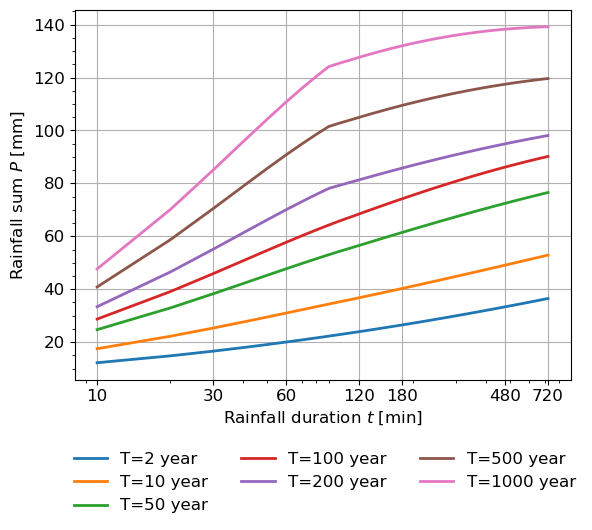

In [7]:
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt

# Rainfall duration curve
def f_kappa(D, T):
    '''Only for 10 <= D <= 720 min'''
    if D > 90 and D <= 720 and T > 120:
        kappa = -0.310-0.0544*np.log10(D) + 0.0288*(np.log10(D))**2
    else:
        kappa = -0.0336 - 0.264*np.log10(D) + 0.0636*(np.log10(D))**2
    return kappa

def f_xi(D):
    '''Only for 10 <= D <= 720 min'''
    return 1.02*(7.339+0.848*np.log10(D)+2.844*(np.log10(D))**2)

def f_gamma(D):
    '''Only for 10 <= D <= 720 min'''
    if D <= 104:
        gamma = 0.04704 + 0.1979*np.log10(D) - 0.05729*(np.log10(D))**2
    else:
        gamma = 0.2801 - 0.0333*np.log10(D)
    return gamma

def glo_distribution(D, T): # use the generalized logistic distribution
    '''Only for 10 <= D <= 720 min'''
    kappa = f_kappa(D, T)
    xi = f_xi(D)
    gamma = f_gamma(D)
    if kappa != 0:
        F = xi*(1+gamma/kappa*(1-((1-np.exp(-1/T))/np.exp(-1/T))**kappa))
    else:
        F = xi*(1-gamma*np.log((1-np.exp(-1/T))/np.exp(-1/T)))
    return F

D = np.arange(10, 12*60+1, 10)
T = [2, 10, 50, 100, 200, 500, 1000]
fig, ax = plt.subplots()
for y in T:
    d_curve = np.zeros(len(D))
    for i in range(len(D)):
        d_curve[i] = glo_distribution(D[i], y)
    ax.plot(D, d_curve, label=f'T={y} year')
ax.set_xlabel(r'Rainfall duration $t$ [min]')
ax.set_ylabel(r'Rainfall sum $P$ [mm]')
fig.legend(bbox_to_anchor=(0.1,-0.2), ncol=3, loc='lower left', frameon=False)
ax.set_xscale('log')
ax.set_xticks((10, 30, 60, 120, 180, 480, 720))
ax.get_xaxis().set_major_formatter(tick.ScalarFormatter())
ax.minorticks_on()
ax.grid('on')

# Save the figure to a file
fig.savefig("../images/7.3-rainfall_duration.png", bbox_inches='tight')
plt.show()


```{figure} ../images/7.3-rainfall_duration.png
:figwidth: 600px
:name: "fig-rainfall-duration"

Rainfall duration curve.
```

- *Area $A$* - The area is defined as the drainage surface area [ha], measured in a horizontal plane. The area is usually measured from plans or maps using a planimeter. The area includes all land enclosed by the surrounding drainage divides. In highway drainage design, this area will frequently include upland properties beyond the highway right-of-way.

```{table} Runoff Coefficient Adjustment Factor
:name: tab:2
| RECURRENCE INTERVAL | RUNOFF COEFFICIENT ADJUSTMENT FACTOR |
| --- | --- | 
| 10 years or less | 1.0 |
| 25 years | 1.1 |
| 50 years | 1.2 |
| 100 years | 1.25 |
```
- *Time of Concentration* $t_c$ (NL: *Looptijd*) - The time of concentration ($t_c$), is defined as the time it takes for runoff to travel from the hydraulically most distant point in the watershed to the point of reference downstream. Most drainage paths consist of overland flow segments as well as channel flow segments. The overland flow component can be further divided into a sheet flow segment and a shallow concentrated flow segment. Urban drainage basins often will have one or more pipe flow segments. The travel time is computed for each flow segment and the time of concentration is equal to the sum of the individual travel times, as follows:

$$
        t_c \ = t_{osf} + t_{scf} + t_{ocf} + t_{pf}
$$ (timeofconcentration)

Where:

| | | |
| --- | --- | --- |
| $t_c$ | Time of concentration | [T] |
| $t_{osf}$ | Travel time for the sheet flow segment | [T] |
| $t_{scf}$ | Travel time for the shallow concentrated flow segment | [T] |
| $t_{ocf}$ | Travel time for the open-channel flow segment(s) | [T] |
| $t_{pf}$ | Travel time for the pipe flow segment(s) | [T] |
    

The drainage path used to determine the time of concentration does not necessarily need to include all of the segments listed above. As an example, a roadway pavement bounded by curbs and drained by an inlet connected to a storm drain will have segments of overland sheet flow (pavement), open-channel flow (gutter), and pipe flow (storm drain). There is no shallow concentrated flow segment.


The travel times for the flow segments are determined as follows.

- *Overland Sheet Flow* - Overland sheet flow is shallow flow over a plane surface. It occurs in the furthest upstream segment of the drainage path, which is located immediately downstream from the drainage divide. The length of the overland sheet flow segment is the shorter of: the distance between the drainage divide and the upper end of a defined channel, and a distance of 100 meters. The overland sheet flow velocity is usually slower than the velocities further downstream. The kinematic wave equation can be used to estimate the time of concentration associated with overland sheet flow. The equation is shown below, and it is only applicable for travel distances equal to or less than 100 m.

$$
        t_{osf} = \frac{K_u}{i^{0.4}} (\frac{n l}{\sqrt{s}})^{0.6}
$$ (kinematic)

Where:

| | | |
| --- | --- | --- |
| $t_{osf}$ | Travel time for the overland sheet flow segment | [min] |
| $K_u$ | empirical coefficient, equal to 6.92 | [-] |
| $l$ | Length of the overland sheet flow segment | [m] |
| $n$ | Manning's roughness coefficient (See {numref}`tab:3`) | [s/m$^{1/3}$] |
| $i$ | Rainfall intensity | [mm/hr] |
| $s$ | The average slope of the overland area | [-] |

 Calculating the time of concentration for overland sheet flow is an iterative or trial-and-error process because both the flow time and the rainfall intensity are unknown. The procedure is outlined in {numref}`DischargeJunctions`.

```{table} Manning's Roughness Coefficients ofr Overland Sheet Flow
:name: tab:3
| | |
| --- | --- | 
| Pavement & Roofs | 0.014 |
| City Business Areas | 0.014 |
| Graveled Surfaces | 0.020 |
| Apartment Dwelling Areas | 0.050 |
| Industrial Areas | 0.050 |
| Urban Residential Areas | 0.080 |
| Meadows, Pastures & Range Land | 0.150 |
| Rural Residential Areas | 0.240 |
| Playgrounds, Light Turf | 0.240 |
| Parks & Cemeteries, Heavy Turf | 0.400 |
| Woodland & Forests | 0.400 | 
```

- *Shallow Concentrated Flow* - Overland sheet flow often becomes either shallow concentrated flow or open-channel flow as it progresses down the drainage. It becomes shallow concentrated flow if it enters a shallow or poorly defined channel such as a gully or rill. The average shallow concentrated flow velocity can be approximated using {numref}`fig:shallowconflow`, in which the velocity is a function of the watercourse slope and the surface type. The travel time for the shallow concentrated flow segment is calculated by the following formula:

$$
        t_{scf} = \frac{l}{v}
$$ (shallowflow)

Where:

| | | |
| --- | --- | --- |
| $t_{scf}$ | Travel time for the shallow concentrated flow segment | [T] |
| $l$ | Length of the shallow concentrated flow segment | [L] |
| $v$ | Average flow velocity | [L/T] |

```{figure} ../images/shallowconflow.png 
--- 
height: 300px 
name: fig:shallowconflow 
--- 
Shallow concentrated flow velocities
``` 
- *Open-Channel and Pipe Flow* - Overland sheet flow, or shallow concentrated flow, becomes open-channel flow when it enters a defined channel with known cross-sectional geometry, a channel visible on aerial photographs, or a channel indicated on a map. Sheet or shallow concentrated flow becomes pipe flow when it enters a closed conduit such as a culvert or storm drain. The velocities in the segments of the drainage path with open-channel or pipe flow are determined by Manning's equation. Once the velocity is known, the travel time for the segment is calculated by dividing the segment length by the velocity. The procedure is similar to the method used with Equation {eq}`shallowflow` for shallow concentrated flow. Flows in open-channels, conduits and gutters are discussed in {numref}`chezy-manning-flow`.

(DischargeJunctions)=
### Discharges at Junctions

The locations where tributary sub-basin and basin drainage paths connect to each other are called *flow junctions* or *junctions*. An important part of a hydraulic analysis is to determine the storm runoff that will pass through these junctions. In many cases, it can be assumed that the storm runoff occurs when the entire upstream area is contributing to runoff. This occurs when the storm duration is equal to the time of concentration of the tributary with the longest time of concentration, based on the assumptions used in the rational method.

The preceding assumption is not valid in some instances. Sometimes, the storm runoff at a junction occurs when the storm duration corresponds to the time of concentration of the tributary with a shorter time of concentration. When this occurs, the entire area of the tributary with the shorter time of concentration will be contributing to runoff, and only a portion of the area with the longer time of concentration will be contributing to runoff. The runoff from the more remote portions of the drainage basin with the longer time of concentration will not yet have arrived at the junction.

The designer should be aware that the storm runoff at a junction can occur when the storm duration corresponds to the time of concentration of a tributary, and this possibility should be checked at critical junctions. **This situation is most likely at junctions where the runoff from a large and impervious subbasin with a shorter time of concentration joins the runoff from an upstream subbasin that is mostly pervious with a longer time of concentration.** The following procedure can be used to determine discharges into junctions (and thus eventually storm runoff).

- **Step 1** - Calculate the times of concentration of the various tributaries upstream of the junction. For tributaries $A, B ... n$, these are $t_{c,A}, t_{c,B} ... t_{c,n}$. For the sake of organization, order the tributaries successively based on time of concentration. The tributary with the longest time of concentration is Tributary $A$, the tributary with the next longest time of concentration is Tributary $B$, etc.
- **Step 2** - Calculate the discharges from Tributaries $A, B ... n$ using the rainfall intensity corresponding to $t_{c,A}$. This is $i_A$. The full area of each tributary is contributing to runoff. The formulae to calculate the discharges from each tributary, based on Equation 1, are:

$$
        Q_A = C_f  C_A i_A A_A 
$$

$$
        Q_B = C_f C_B i_A A_B  
$$

$$
        Q_n = C_f C_n i_A A_n 
$$ 

The total discharge into the junction is $Q_{Total}(t_{c,A}) = Q_A + Q_B + .. + Q_n$

- **Step 3** - Recalculate the discharges from Tributaries $A, B ... n$ using the rainfall intensity corresponding to $t_{c,B}$. This is $i_{B}$. Only a portion of the area of the tributary with the longer time of concentration will contribute to runoff. In this case, it would be Tributary $A$. Use the ratio of the times of concentration to determine the portion that contributes to runoff, as follows:

$$
        Q_A = C_f C_A i_B \frac{t_{c,B}}{t_{c,A}} A_A
$$

The full area of each tributary that has an equal or shorter time of concentration will contribute to runoff. These are tributaries $B ... n$. The formulae to calculate the discharges are:

$$
        Q_B = C_f C_B i_B A_B
$$

$$
        Q_n = C_f C_n i_B A_n
$$

The total discharge into the junction is $Q_{Total}(t_{c,B}) = Q_A + Q_B + .. + Q_n$

- **Step 4** - Recalculate the discharges from Tributaries $A, B ... n$ using the rainfall intensity corresponding to $t_{cn}$. This is $i_n$. Only portions of the drainage areas of the tributaries with the longer times of concentration will contribute to runoff. In this case, this would be Tributaries $A$ and $B$. Use the ratios of the times of concentration to determine the portions that contribute to runoff, as follows:

$$
    Q_A = C_f C_A i_n \frac{t_{c,n}}{t_{c,A}} A_A 
$$

$$
    Q_B = C_f C_B i_n \frac{t_{c,n}}{t_{c,B}} A_B 
$$

and 

$$
    Q_n = C_f C_n i_n A_n
$$

The total discharge into the junction is $Q_{Total}(t_{c,n}) = Q_A + Q_B + Q_n$ 

- **Step 5** - Compare the total discharges into the junction based on the different times of concentration. In this case this would be the results of Steps 2, 3, and 4. The highest total discharge governs, and it is to be used in the design or analysis as storm runoff.


In [8]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_rational1
```

Several urban residential lots are the first drainage basin of a storm drain system. The 10-year time of concentration $t_c$, and runoff $Q$ are needed. The lots are small and it is assumed that runoff will be overland sheet flow. The project location data contains the following:

- Basin area *A* = 0.58 ha
- Length of overland flow *L* = 50 m
- Basin slope *s* = 0.02 m 
- Development density = 20 housing units per ha
- The basin is located in a village in the south of the Netherlands.

a) Compute the time of concentration and the corresponding rainfall intensity by hand. 

b) Compute the time of concentration and the corresponding rainfall intensity using Python to loop through the iterations. Use the function `glo_distribution` from the code of {numref}`fig-rainfall-duration` to compute the rainfall intensity.

c) Compute the storm runoff corresponding to the 10-year recurrence interval.

```{exercise-end}
```

:::{dropdown} Answer&nbsp;{ref}`ex_rational1`a
From {numref}`tab:3`, Manning's roughness coefficient $n$ is 0.240 (for a rural residential area).

A time of concentration $t_c$ is assumed, and the corresponding rainfall intensity $i$ is determined from the precipitation duration-recurrence interval curve in {numref}`fig-rainfall-duration`, for a 10-year recurrence interval. Values from this curve are used in the kinematic wave equation ({eq}`kinematic`) to calculate the $t_c$, and the calculated $t_c$ is compared to the assumed $t_c$. If the calculated and assumed $t_c$ values are the same, then the solution for $t_c$ has been found. If the calculated and assumed $t_c$ values are different, a new $t_c$ and corresponding $i$ are used in Equation {eq}`kinematic`. This procedure is repeated until the calculated $t_c$ is in agreement with the assumed $t_c$, as follows:

**Iteration 1**: Assuming $t_c$ = 10 minutes, $i$ = 16 mm/10 min $= 16 * \frac{60}{10} = 16*6 = 90$ mm/h. Calculated $t_c$ = 16.4 minutes.

$$
    t_c = \frac{6.92}{90^{0.4}} (\frac{0.240 * 50}{\sqrt{0.02}})^{0.6} = 16.4 \text{ min}
$$

Assumed and calculated $t_c$ are not the same. Perform a second iteration.

**Iteration 2**: Assuming $t_c$ = 16.4 minutes, $i$ = 19 mm/16.4 min = $19*\frac{60}{16.4} = 20*3.66 = 69.5$ mm/h. Calculated $t_c$ = 18.2 minutes.

$$
    t_c = \frac{6.92}{69.5^{0.4}} (\frac{0.240 * 50}{\sqrt{0.02}})^{0.6} = 18 \text{ min}
$$

Assumed and calculated $t_c$ are not the same. Perform a third iteration.

**Iteration 3**: Assuming $t_c$ = 18.2 minutes, $i$ = 20 mm/18.2 min = $20*\frac{60}{18.2} = 21*3.37 = 65.9$ mm/h. Calculated $t_c$ = 18.6 minutes.

$$
    t_c = \frac{6.92}{70.8^{0.4}} (\frac{0.240 * 50}{\sqrt{0.02}})^{0.6} = 18.6 \text{ min}
$$

Since the assumed and calculated $t_c$ are in agreement (considering a margin for reading errors), $t_c$ = 18.5 minutes and $i$ = 66 mm/h.
:::


:::{dropdown} Answer&nbsp;{ref}`ex_rational1`b
The results are computed in the Python code below:
:::

In [9]:
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt


# Rainfall duration curve
def f_kappa(D, T):
    '''Only for 10 <= D <= 720 min'''
    if D > 90 and D <= 720 and T > 120:
        kappa = -0.310-0.0544*np.log10(D) + 0.0288*(np.log10(D))**2
    else:
        kappa = -0.0336 - 0.264*np.log10(D) + 0.0636*(np.log10(D))**2
    return kappa

def f_xi(D):
    '''Only for 10 <= D <= 720 min'''
    return 1.02*(7.339+0.848*np.log10(D)+2.844*(np.log10(D))**2)

def f_gamma(D):
    '''Only for 10 <= D <= 720 min'''
    if D <= 104:
        gamma = 0.04704 + 0.1979*np.log10(D) - 0.05729*(np.log10(D))**2
    else:
        gamma = 0.2801 - 0.0333*np.log10(D)
    return gamma

def glo_distribution(D, T): # use the generalized logistic distribution
    '''Only for 10 <= D <= 720 min'''
    kappa = f_kappa(D, T)
    xi = f_xi(D)
    gamma = f_gamma(D)
    if kappa != 0:
        #F = (1 + (1 - kappa*((D - xi)/gamma*xi)**(1/kappa)))**(-1)
        F = xi*(1+gamma/kappa*(1-((1-np.exp(-1/T))/np.exp(-1/T))**kappa))
    else:
        #F = (1 + np.exp(-1*((D - xi)/gamma*xi)))**(-1)
        F = xi*(1-gamma*np.log((1-np.exp(-1/T))/np.exp(-1/T)))
    return F

tc_a = 10       # assumed time of concentration
i = 16*6        # convert from mm/10min to mm/h
tc_i = 0        # iterated time of concentration
n = 0.240       # mannings roughness coefficient
Ku = 6.92
s = 0.02        # slope
l = 50          # length of flow segment

for j in range(20):     # maximum of 20 iterations
    tc_i = Ku/i**0.4 * (n*l/np.sqrt(s))**0.6
    i = glo_distribution(tc_i, 10)*60/tc_i
    if np.abs(tc_a - tc_i) < 0.01:
        break
    tc_a = tc_i
    
print(f'The time of concentration is {tc_i:.2f} min and the corresponding rainfall intensity is {i:.2f} mm/h')
    

The time of concentration is 18.02 min and the corresponding rainfall intensity is 71.45 mm/h


:::{dropdown} Answer&nbsp;{ref}`ex_rational1`c
Use of the precipitation duration-recurrence interval curve shown in {numref}`fig-rainfall-duration`.

From {numref}`tab:2`: $Cf$ = 1.0 for a 10-year recurrence interval.

From {numref}`tab:3`: $C$ = 0.55 (rolling terrain, normal residential)

The storm runoff is calculated using the rational method (equation {eq}`rational`) as follows:

$$
    Q_{10} = (1.0) (0.55) (66 * \frac{10^{-3}}{3600}) (0.58 * 10^4) = 0.06 \ \text{m$^3$/s}
$$
:::

In [10]:
# Note that the code cells below is used for the website only.

```{exercise-start}
:label: ex_rational2
```
Drainage from the basin shown in {numref}`fig:example2` flows to a highway culvert crossing. Storm runoff is needed for a 50-year design storm using the rational method (Equation {eq}`rational`). A runoff coefficient adjustment factor $C_f$ is needed because storm runoff is to be determined for a 50-year storm. From {numref}`tab:2`, the adjustment factor is: $C_f$ = 1.2.


```{figure} ../images/figarea.png 
--- 
height: 300px 
name: fig:example2
--- 
Drainage basin in Limburg, the Netherlands
```
a) Determine the composite runoff coefficient $C$.

The rainfall intensity $i$ is needed. The 50-year precipitation duration curve (see {numref}`fig-rainfall-duration`) will be used. The time of concentration $t_c$ must first be estimated to obtain the rainfall intensity. For this example, the drainage path used to determine the time of concentration is composed of two segments. The first segment is 95 meters long and it is assumed to be overland sheet flow. The remaining 275 meter long segment is assumed to be shallow concentrated flow.

b) Compute the time of concentration for the area, which consists of the travel time for the overland sheet flow segment and the travel time for the shallow concentrated flow segment.

c) Determine the rainfall intensity corresponding to the computed time of concentration

d) Compute the storm runoff

```{exercise-end}
```

:::{dropdown} Answer&nbsp;{ref}`ex_rational2`a
A composite runoff coefficient $C$ is needed because the drainage basin contains sub-areas with different $C$ values. Sub-area $C$ values are from {numref}`tab:1`, and the composite $C$ value is calculated as follows:
 
| Description | $C$ Value | Area [ha] | Impervious Area <br /> $C_i$ $A_i$ [ha] |
| --- | --- | --- | --- | 
| Rolling Forest | 0.15 | 1.4 | 0.21 |
| Flat Light Residential | 0.35 | 1.2 | 0.42 |
| Flat Pasture | 0.25 | 2.1 | 0.53 |
| | | | 
| | Total | 4.7 | 1.16 |


The composite runoff coefficient is calculated using Equation {eq}`composite` as follows:

$$
    C = \frac{(0.21 + 0.42 + 0.53)}{4.7} = \frac{1.16}{4.7} = 0.25 [-]
$$

The area $A$ is also calculated during this step: $A$ = 4.7 hectares.
:::

:::{dropdown} Answer&nbsp;{ref}`ex_rational2`b
- **Overland sheet flow segment -** The travel time for the overland sheet flow segment is calculated as follows.

From {numref}`tab:3`: n = 0.40 (woodland and forest)

From Equation {eq}`kinematic`:

$$
    t_{osf} = \frac{6.92}{i^{0.4}} (\frac{0.40 * 95}{\sqrt{0.05}})^{0.6}
$$

From the 50-year precipitation duration-recurrence interval curve, and using a trial and error solution (see previous example problem): $t_{osf}$ = 25 minutes, with $i$ = 86 mm/h.

- **Shallow concentrated flow segment -** The travel time for the shallow concentrated flow segment is calculated as follows. 

From the location data, 140-95 = 45 m of the drainage path is over forested land with a 5 percent slope: $l$ = 45 m, and $s$ = 5 \%

From {numref}`fig:shallowconflow`: $v$ = 0.17 m/s 

From Equation {eq}`shallowflow`, the travel time for shallow concentrated flow over forested land is:

$$
    t_{scf, \text{\ forested land}} = \frac{45}{0.17} = 265 \ \text{s} = \frac{265}{60} = 4.4 \ \text{min}
$$

From the location data, the last 225 meters of the drainage path is a grassed waterway at a 1 percent slope: $l$ = 225 m, s = 1 \%

From {numref}`fig:shallowconflow`: $v$ = 0.45 m/s

The travel time for shallow concentrated flow down the grassed waterway is:

$$
    t_{scf, \text{\ grassed waterway}} = \frac{225}{0.45} = 500 \ \text{s} = \frac{500}{60} = 8.3 \ \text{min}
$$

From Equation {eq}`timeofconcentration`, the time of concentration is $t_c = 25 + 4.4 + 8.3 = 38$ min
:::

:::{dropdown} Answer&nbsp;{ref}`ex_rational2`c
From the precipitation duration-recurrence interval curve using a rainfall duration that corresponds to the 38 minute time of concentration, the amount of rainfall is approximately 42 mm, so $i = 42 * \frac{60}{38} = 66$ mm/h
:::

:::{dropdown} Answer&nbsp;{ref}`ex_rational2`d
From equation {eq}`rational`, the storm runoff is calculated as follows:

$$
    Q_{50} = (1.2) (0.25) (66 * \frac{10^{-3}}{3600}) (4.7 * 10^4) = 0.26 \ \text{m$^3$/s}
$$
:::
